In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest

In [11]:
# California housing prices
pdf = pd.read_csv('https://raw.githubusercontent.com/flyandlure/datasets/master/housing.csv')
pdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value'>

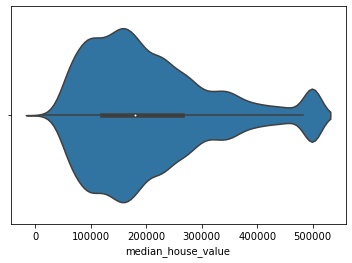

In [14]:
sns.violinplot(x=pdf["median_house_value"])

In [58]:
# sns.boxplot(data=pdf["median_house_value"])

In [17]:
# Initiate the model
model=IsolationForest(n_estimators=50, 
                        max_samples='auto', 
                        contamination=float(0.1),
                        max_features=1.0)

# n_estimators = # base estimators in the ensemble (default = 100)
# max_samples = # samples to draw from X to train each base estimator (default = "auto")
# contamination = Amount of contamination of the data set, i.e. the proportion of outliers in the data set. 
#                 float:(0, 0.5]
# max_features = # features to draw from X to train each base estimator. (default = 1.0)


model.fit(pdf[["median_house_value"]])

/Users/w1ufxk2/miniconda3/envs/blog/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=50)

In [ ]:
# help(IsolationForest)

In [60]:
# Average anomaly score of X 
pdf['scores']=model.decision_function(pdf[['median_house_value']]) 

# Perform fit on X and returns labels for X. Returns -1 for outliers and 1 for inliers.
pdf['anomaly']=model.predict(pdf[['median_house_value']]) 

anomaly=pdf.loc[pdf['anomaly']==-1]
anomaly_index=list(anomaly.index)

pdf[['scores', 'anomaly']].head(5)
# 1 = normal
# -1 = anomaly

,scores,anomaly
0,-0.089994,-1
1,0.011368,1
2,0.035795,1
3,0.040869,1
4,0.038107,1


Anomaly score = mean anomaly scores of trees in the forest.

The measure of normality of an observation given a tree is the depth of the leaf containing this observation, which is equivalent to the number of splittings required to isolate this point.

In [57]:
# model evaluation
# define a threshold for outlier limit
threshold = 400000

total_counter = pdf['median_house_value'].count()

outliers_counter = len(pdf[pdf['median_house_value'] > threshold])

print(f"Houses in dataset = {total_counter}\n"
f"Houses with price higher than {threshold}€ = {outliers_counter}")

print("Accuracy percentage:", 100*list(pdf['anomaly']).count(-1)/(outliers_counter))

Houses in dataset = 20640
Houses with price higher than 400000€ = 1744
Accuracy percentage: 96.78899082568807
